# TASK_4: SALES PREDICTION WITH PYTHON

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Dataset

In [3]:
# calling the dataset
df = pd.read_csv('./advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# dimensions of the dataset
print(f'''Number of rows: {df.shape[0]}
Number of Columns: {df.shape[1]}''')

Number of rows: 200
Number of Columns: 4


In [5]:
# checking for the missing values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation among the Variables')

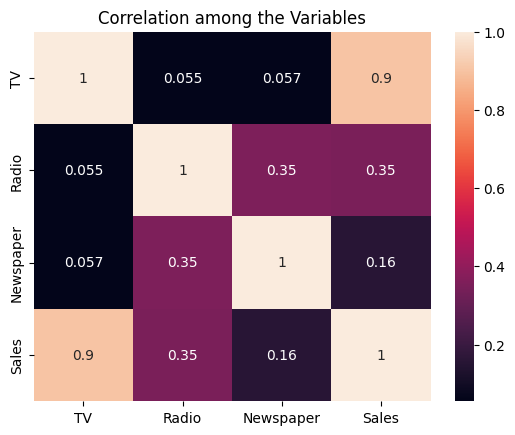

In [6]:
# correlation among the the variables
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.title('Correlation among the Variables')

Text(0, 0.5, 'Values')

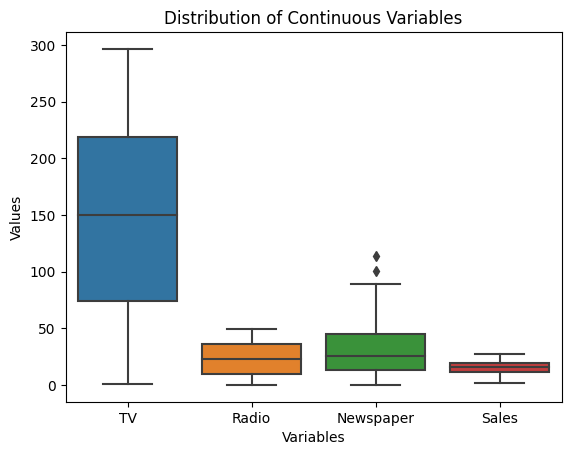

In [7]:
# distribution of the variables
sns.boxplot(df.melt(value_vars=df.columns), x='variable', y='value')
plt.title('Distribution of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

### Dataset Preparation

In [8]:
# getting the X and y
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [9]:
# splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(f'''X Train: {X_train.shape}
X Test: {X_test.shape}
y Train: {y_train.shape}
y Test: {y_test.shape}''')

X Train: (160, 3)
X Test: (40, 3)
y Train: (160,)
y Test: (40,)


In [10]:
# preprocessing
preprocess = Pipeline([
    ('scaler', StandardScaler())
])

# model
model = Pipeline([
    ('preprocess', preprocess),
    ('regressor', RandomForestRegressor())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [11]:
# prediction
y_pred = model.predict(X_test)
print(f'Testing Accuracy: {round(100*r2_score(y_test, y_pred), 2)} %')

Testing Accuracy: 94.02 %


In [12]:
# saving the model
with open('./model.pkl', 'wb') as fp:
    pickle.dump(model, fp)